In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
# from tensorflow import keras as keras 

from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

2.2.0


ModuleNotFoundError: No module named 'keras'

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Zad 
Pibierz zbiór danych

In [47]:
from keras.datasets import mnist
from keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)

nb_classes = len(np.unique(y_train))
n_samples = X_train.shape[0]

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
(28, 28, 1)


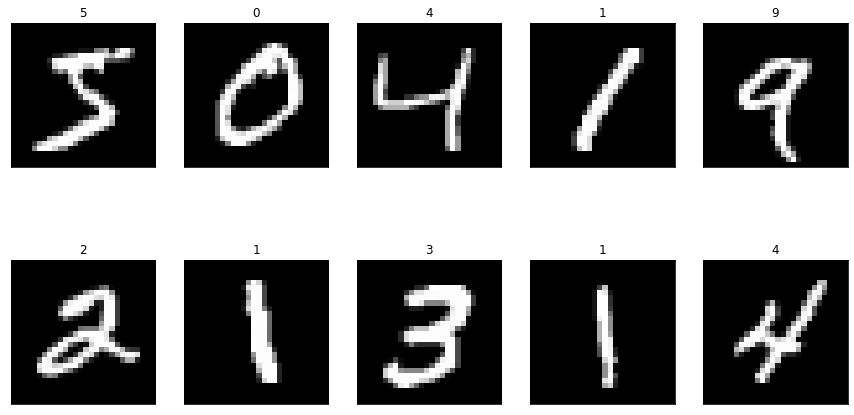

In [48]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_train, X_train, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [49]:
np.max(X_train[0])

255

### Normalize

In [50]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(28, 28, 1)

In [51]:
np.max(X_train[0])

1.0

# Zad
Przekopiuj architekturę:

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

In [57]:
history_1 = History()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [58]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_1])
model.evaluate(X_test,y_test)

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 106s 2ms/step - loss: 0.2224 - accuracy: 0.9322 - val_loss: 0.0601 - val_accuracy: 0.9820
Epoch 2/100
45000/45000 [==============================] - 107s 2ms/step - loss: 0.0911 - accuracy: 0.9723 - val_loss: 0.0554 - val_accuracy: 0.9823
Epoch 3/100
45000/45000 [==============================] - 107s 2ms/step - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.0471 - val_accuracy: 0.9873
Epoch 4/100
45000/45000 [==============================] - 107s 2ms/step - loss: 0.0574 - accuracy: 0.9820 - val_loss: 0.0463 - val_accuracy: 0.9869
Epoch 5/100
45000/45000 [==============================] - 106s 2ms/step - loss: 0.0460 - accuracy: 0.9850 - val_loss: 0.0413 - val_accuracy: 0.9877
Epoch 6/100
45000/45000 [==============================] - 109s 2ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0414 - val_accuracy: 0.9893
Epoch 7/100
45000/45000 [==============================]

[0.03679875134745394, 0.989799976348877]

In [29]:
model.predict_proba(X_test)

array([[6.5261447e-03, 8.7159348e-04, 6.8223059e-01, 3.1037161e-01],
       [1.8439619e-01, 7.8600258e-01, 2.4106387e-02, 5.4948772e-03],
       [7.6311707e-02, 5.9626406e-01, 6.1102286e-03, 3.2131404e-01],
       ...,
       [2.8884558e-02, 1.2361154e-05, 7.0163209e-05, 9.7103298e-01],
       [1.0098425e-05, 7.3584528e-07, 9.4779115e-03, 9.9051124e-01],
       [3.4784377e-01, 5.5623430e-01, 6.7624851e-04, 9.5245697e-02]],
      dtype=float32)

In [30]:
model.predict_classes(X_test)

array([2, 1, 1, ..., 3, 3, 1], dtype=int64)

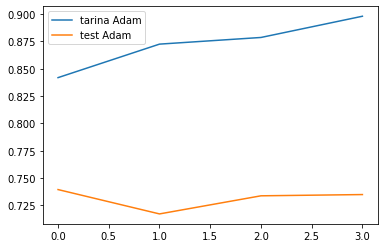

In [34]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()